
# RUN VCE - better in separate script

In [17]:
# import torch
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from matplotlib.offsetbox import AnnotationBbox, OffsetImage
# from tqdm import tqdm
# from omegaconf import OmegaConf
# import umap
# from models import JointLatentDiffusionMultilabel, MultilabelClassifier
# from datasets import ChestXRay_nih_bbox
# import torchvision as tv
# from ldm.util import default
# import matplotlib.pyplot as plt
# import matplotlib.patches as patches
# from einops import rearrange, repeat
# from ldm.models.diffusion.ddim import DDIMSampler
# import os

# os.environ["CUDA_VISIBLE_DEVICES"]="1"
# device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")



In [18]:
# # config = OmegaConf.load("logs/a2_jd_classweight0_001_JointLatentDiffusionMultilabel_2024-02-08T16-53-13/configs/config.yaml")
# # config.model.params["ckpt_path"] = f"logs/a2_jd_classweight0_001_JointLatentDiffusionMultilabel_2024-02-08T16-53-13/checkpoints/last.ckpt"

# # config = OmegaConf.load("logs/a7_jd_lr10_4_bcew_JointLatentDiffusionMultilabel_2024-02-09T03-14-54/configs/config.yaml")
# # config.model.params["ckpt_path"] = f"logs/a7_jd_lr10_4_bcew_JointLatentDiffusionMultilabel_2024-02-09T03-14-54/checkpoints/last.ckpt"

# config = OmegaConf.load("logs/a8_jd_lr10_4_14cls_JointLatentDiffusionMultilabel_2024-02-09T07-02-07/configs/config.yaml")
# config.model.params["ckpt_path"] = f"logs/a8_jd_lr10_4_14cls_JointLatentDiffusionMultilabel_2024-02-09T07-02-07/checkpoints/last.ckpt"

# model = JointLatentDiffusionMultilabel(**config.model.get("params", dict()))
# model.sampling_method='conditional_to_x'
# model.sample_grad_scale=40
# model.to("cuda")
# model.eval()



In [19]:
# torch.set_printoptions(sci_mode=False)
# config = OmegaConf.load("/home/jk/Joint-Diffusion-in-Latent-Space/logs/d14_resnet_aug8_100_MultilabelClassifier_2024-02-08T23-03-18/configs/config.yaml")
# ckpt_path = f"/home/jk/Joint-Diffusion-in-Latent-Space/logs/d14_resnet_aug8_100_MultilabelClassifier_2024-02-08T23-03-18/checkpoints/last.ckpt"

# model_2 = MultilabelClassifier(**config.model.get("params", dict()))
# checkpoint = torch.load(ckpt_path)
# model_2.load_state_dict(checkpoint["state_dict"])
# model_2.to("cuda")
# model_2.eval()

In [20]:
# def embed_imgs(model, data_loader, max_samples=100000):
#     # Encode all images in the data_laoder using model, and return both images and encodings
#     img_list, embed_list, bbox_list, label_list = [], [], [], []

#     for imgs, bbox, label in tqdm(data_loader):
#         if len(imgs.shape) == 3:
#             imgs = imgs[..., None]
#         imgs = rearrange(imgs, 'b h w c -> b c h w')

#         with torch.no_grad():
#             encoder_posterior = model.encode_first_stage(imgs.to(device))
#             latent = model.get_first_stage_encoding(encoder_posterior).detach()
#             img_list.append(imgs.cpu())
#             embed_list.append(latent.cpu())
#             bbox_list.append(bbox)
#             label_list.append(label)
#         if max_samples is not None and len(img_list) > max_samples:
#             break
#     return (img_list, embed_list, bbox_list, label_list)

In [14]:
# cl_list = ["Atelectasis","Cardiomegaly","Consolidation","Edema","Effusion","Emphysema","Fibrosis", "Hernia","Infiltration", "Mass", "Nodule","Pleural_Thickening","Pneumonia","Pneumothorax","No Finding"]
# cl_list_loop=cl_list.copy()
# T = 10
# num_timesteps = 1000
   


In [ ]:
# for class_ in cl_list_loop:
#     dataset = ChestXRay_nih_bbox(pick_class=class_)
#     if len(dataset)>0:
#         print(class_, 'has N samples: ', len(dataset))
#         dl = torch.utils.data.DataLoader(dataset, batch_size=min(len(dataset), 32), shuffle=False)

#         ret = embed_imgs(model, dl)
#         batch = 0
#         x_samples_save = []
#         img_original_save = []
#         pred_o_save = []
#         pred_o_ext_save = []
#         pred_ext_save = []
#         bbox_save = []


#         for img_original, z, bbox in zip(ret[0], ret[1], ret[2]):
#             # denoise samples
#             z = z.to("cuda")
#             t = repeat(torch.tensor([T]), '1 -> b', b=len(z))
#             t = t.to("cuda").long()
#             noise = torch.randn_like(z)
#             z_noisy = model.q_sample(x_start=z, t=t, noise=noise)
#             shape = z_noisy.shape            
#             samples, pred_o = model.p_sample_loop(cond=None, shape = shape, original_img = z, 
#                                                 return_intermediates=False, x_T=z_noisy, start_T=T, 
#                                                 pick_class=class_, return_pred_o=True)
#             x_samples = model.decode_first_stage(samples)
            
#             #predictions with external clasisfier
#             img_original = img_original.to("cuda")
#             pred_o_ext = model_2(img_original)
#             pred_ext = model_2(x_samples)

#             x_samples_save.append(x_samples.detach().cpu().clone())
#             del x_samples
#             img_original_save.append(img_original.detach().cpu().clone())
#             del img_original
#             pred_o_save.append(pred_o.detach().cpu().clone())
#             del pred_o
#             pred_o_ext_save.append(pred_o_ext.detach().cpu().clone())
#             del pred_o_ext
#             pred_ext_save.append(pred_ext.detach().cpu().clone())
#             del pred_ext
#             bbox_save.append(bbox.clone())
#             del bbox


#             batch+=1
#             if batch>1000:
#                 break
            
#         folder_to_save = "vce_results_2"
#         torch.save(torch.cat(x_samples_save, dim=0), f'{folder_to_save}/T{T}_{class_}_x_samples.pt')
#         del x_samples_save
#         torch.save(torch.cat(img_original_save, dim=0), f'{folder_to_save}/T{T}_{class_}_img_original.pt')
#         del img_original_save
#         torch.save(torch.cat(pred_o_save, dim=0), f'{folder_to_save}/T{T}_{class_}_pred_o.pt')
#         del pred_o_save
#         torch.save(torch.cat(pred_o_ext_save, dim=0), f'{folder_to_save}/T{T}_{class_}_pred_o_ext.pt')
#         del pred_o_ext_save
#         torch.save(torch.cat(pred_ext_save, dim=0), f'{folder_to_save}/T{T}_{class_}_pred_ext.pt')
#         del pred_ext_save
#         torch.save(torch.cat(bbox_save, dim=0), f'{folder_to_save}/T{T}_{class_}_bbox.pt')
#         del bbox_save

PLOT IMGS

In [10]:
import torch
T = 500
cl_list = ["Atelectasis","Cardiomegaly","Consolidation","Edema","Effusion","Emphysema","Fibrosis", "Hernia","Infiltration", "Mass", "Nodule","Pleural_Thickening","Pneumonia","Pneumothorax","No Finding"]
folder_to_save='vce_results_baseline'
for class_ in cl_list[1:2]:
    x_samples =torch.load(f'{folder_to_save}/T{T}_{class_}_x_samples.pt')
    pred_o = torch.load(f'{folder_to_save}/T{T}_{class_}_pred_o.pt')
    img_original = torch.load(f'{folder_to_save}/T{T}_{class_}_img_original.pt')
    pred_o_ext = torch.load(f'{folder_to_save}/T{T}_{class_}_pred_o_ext.pt')
    pred_ext = torch.load(f'{folder_to_save}/T{T}_{class_}_pred_ext.pt')
    bbox = torch.load(f'{folder_to_save}/T{T}_{class_}_bbox.pt')



In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


all predictins for orig x tensor([0.0924, 0.1464, 0.0858, 0.0610, 0.1490, 0.0127, 0.0096, 0.0035, 0.2791,
        0.0318, 0.0324, 0.0203, 0.0286, 0.0255, 0.4070])
all predictins for x pred start tensor([0.1297, 0.0802, 0.0724, 0.0243, 0.1701, 0.0182, 0.0123, 0.0042, 0.2164,
        0.0296, 0.0290, 0.0266, 0.0208, 0.0630, 0.4476])
predicitons for x original, only class Cardiomegaly tensor(0.1464)
predicitons for x pred start, only class Cardiomegaly tensor(0.0802)


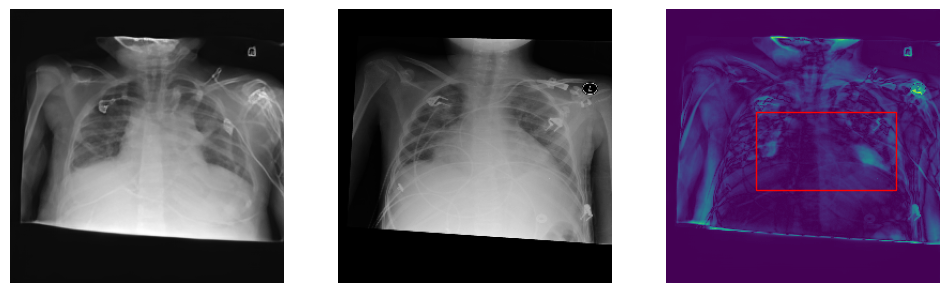

In [16]:
idx_from_batch = 78

fig, axes = plt.subplots(1, 3, figsize=(12, 4))


# Plot the images on the subplots
denoised_guided_normalized = x_samples.cpu()[idx_from_batch].permute(1,2,0)
denoised_guided = denoised_guided_normalized*0.5+0.5
img_ref_normalized = img_original.cpu()[idx_from_batch].permute(1,2,0)
img_ref = img_ref_normalized*0.5+0.5
diff = abs(denoised_guided - img_ref)

ax = 0
axes[ax].imshow(denoised_guided, cmap='gray')
axes[ax].axis('off')

ax +=1
axes[ax].imshow(img_ref, cmap='gray')
axes[ax].axis('off')

ax +=1


x, y, w, h = bbox[idx_from_batch][0], bbox[idx_from_batch][1],bbox[idx_from_batch][2], bbox[idx_from_batch][3]
# Scale the bounding box coordinates from 1024x1024 to 256x256
scaled_x = x * 0.25
scaled_y = y * 0.25
scaled_w = w * 0.25
scaled_h = h * 0.25

# Create a rectangle patch using the scaled coordinates
rect = patches.Rectangle((scaled_x, scaled_y), scaled_w, scaled_h, linewidth=1, edgecolor='r', facecolor='none')

# Add the rectangle patch to the plot
axes[ax].add_patch(rect)


axes[ax].imshow(diff)
axes[ax].axis('off')

#fig.suptitle(ret[3][0][idx_from_batch])

pred_o_ext_for_item = torch.nn.functional.sigmoid(pred_o_ext[idx_from_batch])
pred_ext_for_item = torch.nn.functional.sigmoid(pred_ext[idx_from_batch])
id_class = cl_list.index(class_)
print('all predictins for orig x', pred_o_ext_for_item)
print('all predictins for x pred start', pred_ext_for_item)
print(f'predicitons for x original, only class {cl_list[id_class]}', pred_o_ext_for_item[id_class])
print(f'predicitons for x pred start, only class {cl_list[id_class]}',pred_ext_for_item[id_class])

